# Lab 8 - Classification and Regression Trees

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

## Task 1

In [2]:
data_1 = pd.read_csv("data\\SAheart.data", index_col=0)
data_1.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [3]:
X = data_1.iloc[:, :-1]
y = data_1.iloc[:, -1]
X = X.replace("Present", 1)
X = X.replace("Absent", 0)
X.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
row.names,,,,,,,,,
1,160,12.00,5.73,23.11,1,49,25.30,97.20,52
2,144,0.01,4.41,28.61,0,55,28.87,2.06,63
3,118,0.08,3.48,32.28,1,52,29.14,3.81,46
4,170,7.50,6.41,38.03,1,51,31.99,24.26,58
5,134,13.60,3.50,27.78,1,60,25.99,57.34,49


### (a)

In [4]:
# Fit a classification tree
tree = DecisionTreeClassifier()
tree.fit(X, y)

# Check how different parameters affect the structure and size of the tree
param_grid = {'max_depth': [2, 4, 6, 8, 10, 20, None], 'min_samples_split': [2, 5, 10], 'criterion': ["gini", "entropy", "log_loss"]}
grid_search = GridSearchCV(tree, param_grid)
grid_search.fit(X, y)
pass

### (b)

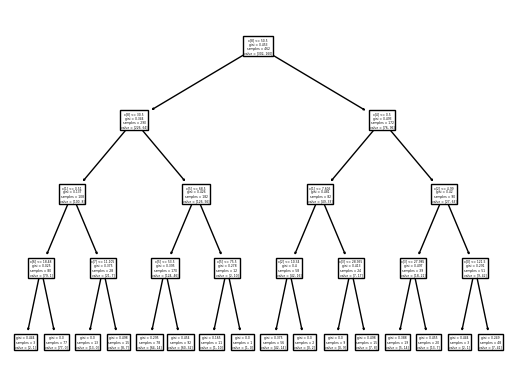

In [5]:
# Draw the structure of the tree
plot_tree(grid_search.best_estimator_)
pass

### (c)

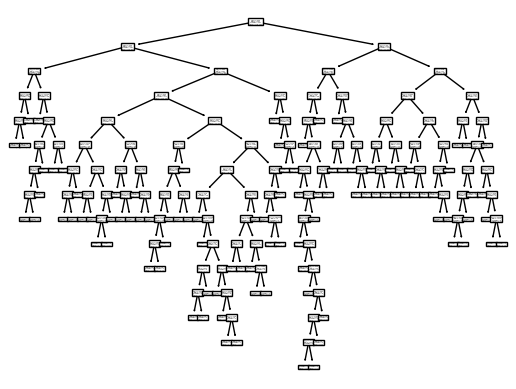

In [6]:
path = tree.cost_complexity_pruning_path(X, y)
ccp_alphas = path.ccp_alphas
tree_scores = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    tree.fit(X, y)
    tree_scores.append(tree.score(X, y))

best_ccp_alpha = ccp_alphas[tree_scores.index(max(tree_scores))]
best_tree = DecisionTreeClassifier(ccp_alpha=best_ccp_alpha)
best_tree.fit(X, y)
plot_tree(best_tree)
pass

In [7]:
tree_scores

[1.0,
 0.9935064935064936,
 0.9935064935064936,
 0.9913419913419913,
 0.9891774891774892,
 0.987012987012987,
 0.9848484848484849,
 0.9826839826839827,
 0.974025974025974,
 0.974025974025974,
 0.9696969696969697,
 0.9458874458874459,
 0.9458874458874459,
 0.948051948051948,
 0.9458874458874459,
 0.9458874458874459,
 0.9458874458874459,
 0.9458874458874459,
 0.9437229437229437,
 0.9415584415584416,
 0.9393939393939394,
 0.9372294372294372,
 0.935064935064935,
 0.9307359307359307,
 0.9285714285714286,
 0.9264069264069265,
 0.9134199134199135,
 0.9090909090909091,
 0.9090909090909091,
 0.9047619047619048,
 0.9047619047619048,
 0.8961038961038961,
 0.8939393939393939,
 0.8787878787878788,
 0.8766233766233766,
 0.8701298701298701,
 0.8593073593073594,
 0.854978354978355,
 0.8506493506493507,
 0.8441558441558441,
 0.8333333333333334,
 0.8095238095238095,
 0.8095238095238095,
 0.8051948051948052,
 0.8051948051948052,
 0.7943722943722944,
 0.7943722943722944,
 0.7835497835497836,
 0.7705627705

In [10]:
print(ccp_alphas)

[0.         0.00189394 0.00189394 0.00194805 0.00196773 0.00207431
 0.00211297 0.00213745 0.0025974  0.0025974  0.00271109 0.002886
 0.002886   0.002886   0.002886   0.002886   0.002886   0.002886
 0.00294613 0.00311943 0.00324675 0.00326797 0.00327955 0.003367
 0.0034632  0.0034632  0.00351105 0.0036075  0.0036075  0.00371058
 0.00371058 0.0038961  0.00393408 0.00397856 0.00419782 0.00430946
 0.00442177 0.0046176  0.00494743 0.00503739 0.0051237  0.00528247
 0.00530303 0.00541126 0.00566177 0.00569032 0.0058151  0.00582986
 0.00631211 0.00777458 0.01374447 0.01536633 0.01601396 0.01644629
 0.05322198]
